<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br><b>Using User-supplied Catalogs</b> <br>
Contact authors: Yumi Choi <br>
Last verified to run: 2024-05-XX <br>
LSST Science Piplines version: Weekly 2024_16 <br>
Container Size: small <br>
Targeted learning level: Beginner <br>

**Description:** Demonstrates a functionality for user-uploaded tables and their use in queries for DP0.3 

**Skills:** Use the TAP service to access the DP0.3 tables, Upload user-supplied tables and retreive tables from the Gaia ESA Archive center using PyVO, Use them in ADQL. 

**LSST Data Products:** TAP tables dp03_catalogs_10yr.SSObject, dp03_catalogs_10yr.MPCORB, dp03_catalogs_10yr.DiaSource, dp03_catalogs_10yr.SSSource

**Packages:** `lsst.rsp.get_tap_service`

**Credit:**
Developed by Yumi Choi. This tutorial is based on <a href="https://dp0-3.lsst.io/tutorials-dp0-3/portal-dp0-3-5.html">a Portal tutorial</a> by Christina Williams for using user-supplied tables in queries for DP0.3 and <a href="https://github.com/rubin-dp0/cst-dev/blob/main/MLG_sandbox/DP03/gaia_hack_day_Feb2024.ipynb">a Jupyter Notebook</a> by Melissan Graham and Jake Kurlander for accessing Gaia data and matching with DP0.3 data for solar system objects.

**Get Support:** Find DP0.3-related documentation and resources at <a href="https://dp0-3.lsst.io">dp0-3.lsst.io</a>. Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1. Introduction

This notebook illustrates the process of uploading user-provided tables via the TAP service and integrating them into queries for DP0.3. It focuses on two types of user-provided tables: (1) those generated outside the Rubin Science Platform (RSP) and then uploaded to it, and (2) tables created within the RSP but fetched from an external database using `PyVO`.

### 1.1 Package imports

Import general python packages and the Rubin Table Access Protocol (TAP) service utilities.

The [PyVO](https://github.com/astropy/pyvo) is a package providing access to remote data and services of the Virtual observatory (VO) using Python.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import getpass
import pyvo
from astropy.table import Table
import pandas as pd

from lsst.rsp import get_tap_service

### 1.2 Define parameters and get the path to the home directory

#### 1.2.1 Set up some plotting defaults

In [2]:
plt.style.use('tableau-colorblind10')
params = {'axes.labelsize': 15,
          'font.size': 15,
          'legend.fontsize': 12}
plt.rcParams.update(params)

#### 1.2.2 Get the path to the home directory

In [3]:
my_username = getpass.getuser()
my_home_dir = '/home/' + my_username + '/'
print(my_home_dir)

/home/galaxyumi331/


## 2. Load a user-supplied table of coordinates for use in cone searches

The same example table for cone searches used in <a href="https://dp0-3.lsst.io/tutorials-dp0-3/portal-dp0-3-5.html">this Portal tutorial</a> is stored in the local `data/` directory. 

### 2.1 Create the Rubin TAP service client

Get an instance of the `LSST TAP` service, and assert that it exists.

In [4]:
lsst_tap = get_tap_service("ssotap")
assert lsst_tap is not None

### 2.2 Read and upload a user-supplied table of coordinates and execute cone searches against the `diaSource` table using a 10'' search radius

In [40]:
t_cat_1 = Table.read('./data/portal_tut05_useruploadcat1.cat', format='ascii.basic')

In [42]:
query = """
    SELECT dia.ra, dia.dec, dia.midPointMjdTai, dia.ssObjectId, ut.ra, ut.dec
    FROM dp03_catalogs_10yr.DiaSource AS dia, TAP_UPLOAD.t1 AS ut
    WHERE CONTAINS(POINT('ICRS', dia.ra, dia.dec), CIRCLE('ICRS', ut.ra, ut.dec, 0.002777777777777778))=1
    ORDER BY dia.ssObjectId
    """

results = lsst_tap.search(query, uploads={"t1": t_cat_1}).to_table()
results

ra,dec,midPointMjdTai,ssObjectId,ra2,dec2
deg,deg,d,,,
float64,float64,float64,int64,float64,float64
349.8496645,-14.3260072,62752.10131,-9104812481934879133,349.8507502,-14.3276051
349.8499379,-14.327309,62060.12541,-6536565009333841460,349.8507502,-14.3276051
345.2034553,-15.5911322,62377.26069,-1711989975490530589,345.2016394,-15.5920336
338.014364,-14.4779895,61741.02776,2956589648411852100,338.0151274,-14.4770618
22.8351124,13.0273351,63450.38788,2956589648411852100,22.8351124,13.0273351
352.2623818,-13.4892628,61632.24295,2956589648411852100,352.2623818,-13.4892628
349.8507502,-14.3276051,61644.29927,2956589648411852100,349.8507502,-14.3276051
349.8505526,-14.3276598,61644.30017,2956589648411852100,349.8507502,-14.3276051


For a quick sanity check, create a plot showing the differences in right ascension ($\Delta$ra) and declination ($\Delta$dec). Expect both $\Delta$ra and $\Delta$dec to be less than 0.002777777777777778 degrees (or 10 arcsecond).

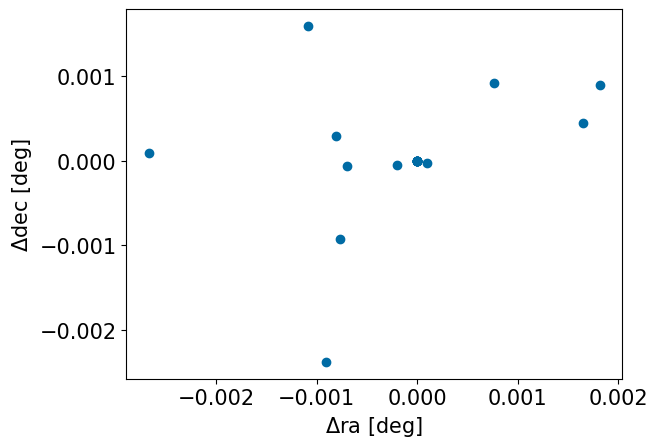

In [7]:
plt.scatter(results['ra']-results['ra2'], results['dec']-results['dec2'])
plt.xlabel(r'$\Delta$ra [deg]')
plt.ylabel(r'$\Delta$dec [deg]')
plt.show()

## 3. ADQL table join with a user-supplied table of SSObject IDs

(start Section 3 with an overview sentence of the purpose or advantage of this feature) The same example table for cone searches used in <a href="https://dp0-3.lsst.io/tutorials-dp0-3/portal-dp0-3-5.html">this Portal tutorial</a> is stored in the local `data/` directory. 


### 3.1 Read and upload a user-supplied table of SSObject IDs and execute query against the `diaSource` table

In [43]:
t_cat_2 = Table.read('./data/portal_tut05_useruploadcat2.cat', format='ascii.basic')

In [46]:
query = """
    SELECT ut2.ssObjectId_user, dia.ssObjectId, dia.ra, dia.dec
    FROM TAP_UPLOAD.t2 as ut2
    INNER JOIN dp03_catalogs_10yr.diaSource as dia
    ON ut2.ssObjectId_user = dia.ssObjectId
    """

results = lsst_tap.search(query, uploads={"t2": t_cat_2}).to_table()
results

ssObjectId_user,ssObjectId,ra,dec
,,deg,deg
int64,int64,float64,float64
5977535780727431144,5977535780727431144,297.6175308,-0.4666219
5977535780727431144,5977535780727431144,267.9602991,13.7540882
5977535780727431144,5977535780727431144,242.0993711,6.867205
5977535780727431144,5977535780727431144,251.1593754,0.5298268
5977535780727431144,5977535780727431144,243.2244299,1.8095232
5977535780727431144,5977535780727431144,287.9080887,8.1408245
5977535780727431144,5977535780727431144,290.2771912,8.3605998
5977535780727431144,5977535780727431144,252.1509606,10.6167461


In [47]:
uniqIds = np.unique(results['ssObjectId'])
print('There are %d matched unique objects.' % (len(uniqIds)))

There are 2 matched unique objects.


For a quick sanity check, create a plot showing sky distribution of these unique objects over 10 years.

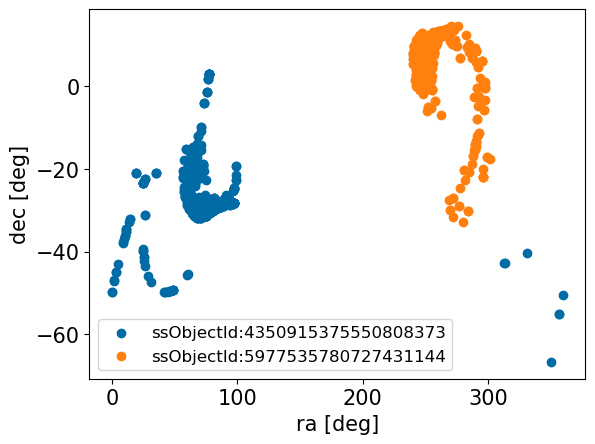

In [48]:
for i in uniqIds:
    add = results['ssObjectId'] == i
    plt.scatter(results['ra'][add], results['dec'][add], 
                label='ssObjectId:'+str(i))
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.legend()
plt.show()

## 4. Gaia data for DP0.3 asteroids

(Christina) Maybe somewhere in here it would be useful to have more explanation of what will happen next (i.e. this is still some kind of external catalog that is uploaded to RSP for matching and other analysis, but now you're demonstrating how to grab it from some other server? Anyway some more general explanation of why this is useful could be helpful. Also, perhaps list 1-2 other examples of what catalogs could be accessed by PyVO? 

This section demonstrates to upload the retreived data xxxx

### 4.1 Access to Gaia database and retrieve Gaia data for main-belt asteroids (MBAs)

Get an instance of the `Gaia TAP` service using `PyVO`, and assert that it exists.

In [49]:
gaia_tap_url = 'https://gea.esac.esa.int/tap-server/tap'
gaia_tap = pyvo.dal.TAPService(gaia_tap_url)
assert gaia_tap is not None
assert gaia_tap.baseurl == gaia_tap_url

Query MBAs from the Gaia database following the population definition used by the JPL Horizons small body database query tool (https://ssd.jpl.nasa.gov/tools/sbdb_query.html): 2.0 < `a` < 3.25 au and `q` > 1.666 au. To expedite the query, restrict the number of objects to retrieve to 1000.

In [119]:
Nobj = 1000

query = """
    SELECT TOP {} denomination, num_observations, inclination,
           eccentricity, semi_major_axis
    FROM gaiadr3.sso_orbits
    WHERE num_observations > 200
    AND semi_major_axis > 2.0
    AND semi_major_axis < 3.2 
    AND semi_major_axis*(1-eccentricity) > 1.666
    """.format(Nobj)

pd_gaia = gaia_tap.search(query).to_table()#.to_pandas()

Make plots showing eccentricity (`e`) and inclination (`i`) against semi-major axis (`a`) of the retrived MBAs. These plots should resmeble the second figure in Section 2.2.2 of the notebook tutorial: <a href="https://github.com/rubin-dp0/tutorial-notebooks/blob/main/DP03_02_Main_Belt_Asteroids.ipynb">DP03_02_Main_Belt_Astetroids.ipynb</a>.

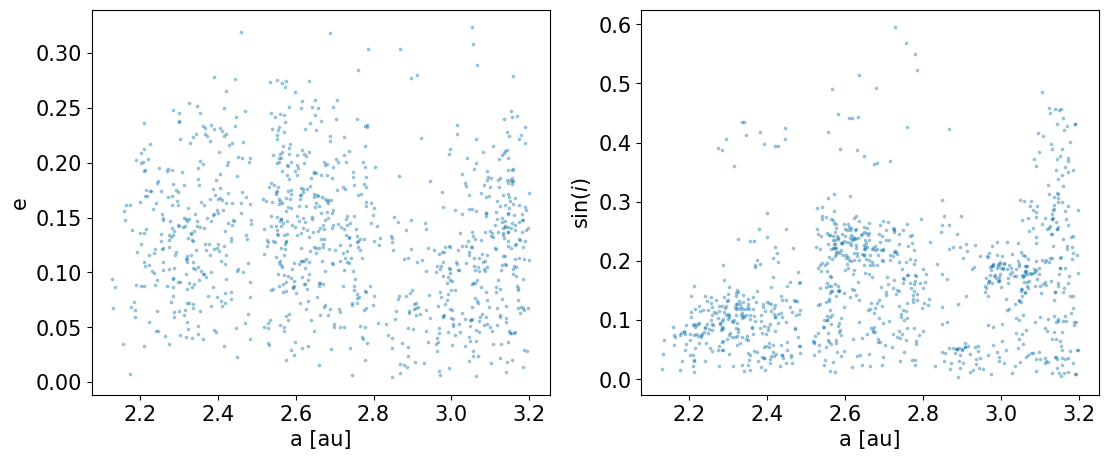

In [120]:
fig = plt.figure(figsize=(13, 5))

plt.subplot(121)
plt.scatter(pd_gaia['semi_major_axis'], pd_gaia['eccentricity'], 
            s=3, alpha=0.3)
plt.xlabel('a [au]')
plt.ylabel('e')

plt.subplot(122)
plt.scatter(pd_gaia['semi_major_axis'], np.sin(pd_gaia['inclination']), 
            s=3, alpha=0.3)
plt.xlabel('a [au]')
plt.ylabel(r'sin($i$)')
plt.show()

The `MPCORB` table in DP0.3 follows the standard format for MPC designation, which is the year, then a space, and then an identifier that is several characters, capital letters and numbers. The `denomination` in some Gaia tables uses underscores instead of spaces and/or lower-case letters instead of capital letters. Thus, the `denomination` column needs to be converted to the standard MPC designation format.

In [147]:
np.ma.getdata(pd_gaia['denomination']).astype("string")

TypeError: data type 'string' not understood

In [138]:

pd_gaia['denomination'].data.data.astype('str').replace('_', ' ')

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [90]:
pd_gaia['mpc_desig1'] = pd_gaia['denomination'].str.replace('_', ' ').str.upper()
pd_gaia['mpc_desig2'] = pd_gaia['denomination'].str.replace('_', ' ')
pd_gaia

AttributeError: 'MaskedColumn' object has no attribute 'str'

In [92]:
pd_gaia['denomination'].dtype

dtype('O')

Save the result as a csv file in `my_home_dir` for the next step as well as your follow-up analysis in the future.

In [84]:
pd_gaia.to_csv(my_home_dir+'gaia_mba.cat', index=False)

### 4.2 Load the saved Gaia table and Join with DP0.3 tables

In [152]:
t_cat_3 = Table.read(my_home_dir+'gaia_mba.cat', format='ascii.basic')

In [157]:
t_cat_3['denomination'].dtype

dtype('S15')

Uploading a table including a column(s) with the dtype of the Unicode string does not work. Converting unicode columns (dtype.kind='U') to bytestring (dtype.kind='S') using the `convert_unicde_to_bytestring` method is required.

In [156]:
t_cat_3.convert_unicode_to_bytestring()

In [155]:
query = """
    SELECT mpc.mpcDesignation, mpc.ssObjectId,
           ut3.denomination, ut3.mpc_desig2,
           dia.ssObjectId, dia.midPointMjdTai, dia.mag, dia.band
    FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN TAP_UPLOAD.t3 as ut3
    ON ut3.mpc_desig1 = mpc.mpcDesignation
    INNER JOIN dp03_catalogs_10yr.DiaSource as dia
    ON dia.ssObjectId = mpc.ssObjectId
    Where dia.band = 'g'
    """

t_lsst = lsst_tap.search(query, uploads={"t3": t_cat_3}).to_table()

DALQueryError: failed to create table TAP_UPLOAD.t3_ftg5f5ndzb9ajn1i unexpected datatype: TapDataType[unicodeChar,15,null]

Select one random asteroid and save its data entry as a small table called `random_mba`.

In [108]:
uniqueObj = np.random.choice(t_lsst['ssObjectId'], 1)[0]
print(uniqueObj)
random_mba = t_lsst[t_lsst['ssObjectId'] == uniqueObj]

62696966431855247


Retrieve Gaia observations for the selected asteroid. 

Occasionally, the following error message may occur: 'DALServiceError: 401 Client Error: 401 for url: https://gea.esac.esa.int/tap-server/tap/sync'. To avoid it, get an instance of the `Gaia TAP` service again before running the query below.

In [109]:
gaia_tap_url = 'https://gea.esac.esa.int/tap-server/tap'
gaia_tap = pyvo.dal.TAPService(gaia_tap_url)
assert gaia_tap is not None
assert gaia_tap.baseurl == gaia_tap_url

In [110]:
query = """
    SELECT epoch_utc, g_mag
    FROM gaiadr3.sso_observation
    WHERE denomination = '{}'
    """.format(random_mba['mpc_desig2'][0])

t_gaia_obs = gaia_tap.search(query).to_table()

Convert Universal Time Coordinated (UTC) observation date to Modified Julian Date (MJD) observation date.

From the [documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_sso_tables/ssec_dm_sso_observation.html), `epoch_utc` is the Gaiacentric epoch UTC, while the LSST records observing time in MJD. The conversion is MJD = UTC + 55197.5 (day).

In [111]:
t_gaia_obs['epoch_mjd'] = t_gaia_obs['epoch_utc'] + 55197.5

Plot the `g`-band light curve for the selected asteroid.

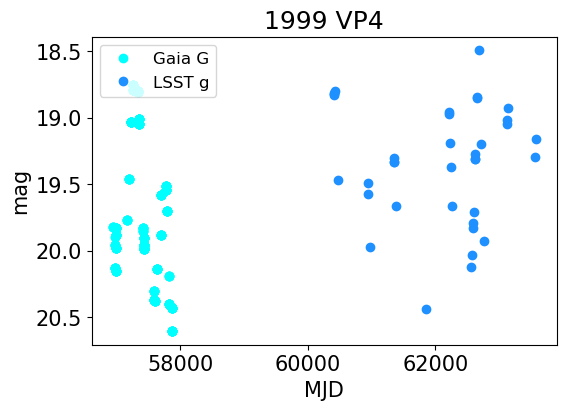

In [112]:
fig = plt.figure(figsize=(6, 4))
plt.plot(t_gaia_obs['epoch_mjd'], t_gaia_obs['g_mag'],
         'o', color='cyan', label='Gaia G')
plt.plot(random_mba['midPointMjdTai'], random_mba['mag'],
         'o', color='dodgerblue', label='LSST g')
ymin = min(t_gaia_obs['g_mag'].min(), min(random_mba['mag']))
ymax = max(t_gaia_obs['g_mag'].max(), min(random_mba['mag']))
plt.ylim(ymax+0.1, ymin-0.1)
plt.legend(loc='upper left')
plt.xlabel('MJD')
plt.ylabel('mag')
plt.title(random_mba['mpcDesignation'][0])
plt.show()

## 5. Excercises for the learner

1. Generate your own user table, perform a spatial and temporal search of the DiaSource table to look for a sample of solar system bodies observed in a specific part of the sky at a specific time. Save the query result table, and use it to search the SSSource table for all observations that exist, by matching on SSObjectId.